In [54]:
import pandas as pd
data = pd.read_csv('CityDataTest.csv', delimiter=';')
data.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
0,Белокуриха,2000,NaN,"15,400.000","15,100.000","15,700.000"
1,Белокуриха,2001,NaN,"15,400.000","15,100.000","15,700.000"
2,Белокуриха,2002,NaN,"15,400.000","15,000.000","15,700.000"
3,Белокуриха,2003,NaN,"15,300.000","15,000.000","15,700.000"
4,Белокуриха,2004,NaN,"15,300.000","14,900.000","15,600.000"


In [55]:
# Число городов
len(data['Город'].unique())

248

In [56]:
data['Город'] = data['Город'].str.strip()
data.sort_values(by=['Город', 'year'], inplace=True)
data.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000"
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000"
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000"
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000"
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000"


In [57]:
data.drop_duplicates(subset=['Город', 'year'], inplace=True)
data.head()

,Город,year,fact,Модель,Нижняя граница,Верхняя граница
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000"
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000"
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000"
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000"
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000"


In [68]:
city_to_region = {
    'Буй': 44, 'Оха': 65, 'Реж': 66, 'Уфа': 2, 'Шуя': 37, 'Абаза': 19, 'Агидель': 2,
    'Алатырь': 21, 'Александровск-Сахалинский': 65, 'Алексин': 71, 'Алзамай': 38,
    'Алушта': 91, 'Анадырь': 87, 'Анапа': 23, 'Ангарск': 38, 'Арзамас': 52, 'Архангельск': 29,
    'Бабаево': 35, 'Барабинск': 54, 'Барыш': 73, 'Белогорск': 28, 'Белокуриха': 22,
    'Березовский': 66, 'Бирюч': 31, 'Бобров': 36, 'Бодайбо': 38, 'Бокситогорск': 47,
    'Болохово': 71, 'Большой Камень': 25, 'Бородино': 24, 'Бузулук': 56, 'Буйнакск': 5,
    'Бутурлиновка': 36, 'Великий Новгород': 53, 'Верхний Тагил': 66, 'Ветлуга': 52,
    'Вихоревка': 38, 'Волгодонск': 61, 'Волгореченск': 44, 'Волжск': 12, 'Володарск': 52,
    'Волхов': 47, 'Воркута': 11, 'Всеволожск': 47, 'Вуктыл': 11, 'Вытегра': 35,
    'Гаврилов Посад': 37, 'Глазов': 18, 'Городец': 52, 'Городовиковск': 8,
    'Гороховец': 33, 'Грязи': 48, 'Губаха': 59, 'Губкинский': 89, 'Гудермес': 20, 'Гусев': 39,
    'Гусь-Хрустальный': 33, 'Десногорск': 67, 'Джанкой': 82, 'Дзержинск': 52, 'Дигора': 15,
    'Дмитриев': 46, 'Долинск': 65, 'Евпатория': 91, 'Егорьевск': 50, 'Елец': 48, 'Елизово': 41,
    'Ессентуки': 26, 'Ефремов': 71, 'Железногорск': 46, 'Жердевка': 68, 'Завитинск': 28,
    'Заволжск': 37, 'Зеленоградск': 39, 'Иваново': 37, 'Инта': 11, 'Ирбит': 66, 'Ишим': 72,
    'Калач': 36, 'Калач-на-Дону': 34, 'Калининск': 64, 'Камбарка': 18,
    'Каменск-Уральский': 66, 'Каменск-Шахтинский': 61, 'Камышин': 34, 'Камышлов': 66,
    'Карабаново': 33, 'Карабулак': 6, 'Карасук': 54, 'Карачаевск': 9, 'Каспийск': 5,
    'Катайск': 45, 'Кашира': 50, 'Кемь': 10, 'Керчь': 91, 'Кизилюрт': 5, 'Кимры': 69,
    'Кинель': 63, 'Киржач': 33, 'Кировград': 66, 'Кировск': 47, 'Клинцы': 32, 'Козельск': 40, 'Кола': 51, 'Коломна': 50, 'Корсаков': 65,
    'Костерево': 33, 'Котельнич': 43, 'Кохма': 37, 'Красавино': 35, 'Краснодар': 23,
    'Краснокаменск': 75, 'Краснослободск': 13, 'Красноуфимск': 66, 'Красный Кут': 64,
    'Кстово': 52, 'Кулебаки': 52, 'Курлово': 33, 'Куртамыш': 45, 'Кызыл': 17, 'Ладушкин': 39,
    'Лахденпохья': 10, 'Ленинск-Кузнецкий': 42, 'Лермонтов': 26, 'Липки': 71, 'Лиски': 36,
    'Лысьва': 59, 'Лянтор': 86, 'Магас': 6, 'Магнитогорск': 74, 'Мглин': 32,
    'Медвежьегорск': 10, 'Медногорск': 56, 'Медынь': 40, 'Мещовск': 40, 'Миасс': 74,
    'Мирный': 14, 'Михайловка': 34, 'Могоча': 75, 'Москва': 77, 'Муравленко': 89,
    'Набережные Челны': 16, 'Навашино': 52, 'Наволоки': 37, 'Назрань': 6,
    'Называевск': 55, 'Невинномысск': 26, 'Неман': 39, 'Нефтекамск': 2,
    'Нижние Серги': 66, 'Нижняя Салда': 66, 'Николаевск-на-Амуре': 27, 'Никольск': 43,
    'Новая Ладога': 47, 'Новоалтайск': 22, 'Новоаннинский': 34, 'Новодвинск': 29,
    'Новокуйбышевск': 63, 'Новотроицк': 56, 'Новохопёрск': 36, 'Новочебоксарск': 21,
    'Новочеркасск': 61, 'Новошахтинск': 61, 'Нягань': 86, 'Облучье': 79, 'Октябрьский': 2,
    'Оренбург': 56, 'Отрадное': 47, 'Отрадный': 63, 'Павловск': 36, 'Партизанск': 25,
    'Пенза': 58, 'Переславль-Залесский': 76, 'Петропавловск-Камчатский': 41,
    'Петушки': 33, 'Плес': 37, 'Покров': 33, 'Полевской': 66, 'Полысаево': 42, 'Почеп': 32,
    'Приволжск': 37, 'Пучеж': 37, 'Пущино': 50, 'Райчихинск': 28, 'Реутов': 50, 'Ртищево': 64,
    'Рыльск': 46, 'Саранск': 13, 'Сарапул': 18, 'Саяногорск': 19, 'Саянск': 38, 'Светлый': 39,
    'Светогорск': 47, 'Семилуки': 36, 'Серафимович': 34, 'Сергач': 52, 'Сертолово': 47,
    'Слободской': 43, 'Советск': 43, 'Сокол': 35, 'Соликамск': 59, 'Сольвычегодск': 29,
    'Сортавала': 10, 'Спасск': 25, 'Среднеуральск': 66, 'Старый Крым': 91, 'Сунжа': 6,
    'Сурск': 58, 'Сызрань': 63, 'Сысерть': 66, 'Таганрог': 61, 'Тара': 55, 'Тобольск': 72,
    'Тольятти': 63, 'Томск': 70, 'Тотьма': 35, 'Туринск': 66, 'Тюкалинск': 55, 'Уварово': 68,
    'Удомля': 69, 'Узловая': 71, 'Ульяновск': 73, 'Урюпинск': 34, 'Усть-Джегута': 9,
    'Усть-Илимск': 38, 'Усть-Катав': 74, 'Фролово': 34, 'Фурманов': 37, 'Химки': 50,
    'Холмск': 65, 'Чебоксары': 21, 'Черкесск': 9, 'Чулым': 54, 'Шарыпово': 24,
    'Шимановск': 28, 'Шлиссельбург': 47, 'Щекино': 71, 'Щигры': 46, 'Электрогорск': 50,
    'Электросталь': 50, 'Югорск': 86, 'Юрьев-Польский': 33, 'Юхнов': 40, 'Якутск': 14,
    'Ялта': 91, 'Ялуторовск': 72, 'Ярославль': 76, 'Ясногорск': 71
}
# Словарь с названиями субъектов РФ
city_to_subject = {
    'Буй': 'Костромская область', 'Оха': 'Сахалинская область', 'Реж': 'Свердловская область', 'Уфа': 'Республика Башкортостан', 'Шуя': 'Ивановская область',
    'Абаза': 'Республика Хакасия', 'Агидель': 'Республика Башкортостан', 'Алатырь': 'Чувашская Республика', 'Александровск-Сахалинский': 'Сахалинская область', 'Алексин': 'Тульская область',
    'Алзамай': 'Иркутская область', 'Алушта': 'Республика Крым', 'Анадырь': 'Чукотский автономный округ', 'Анапа': 'Краснодарский край', 'Ангарск': 'Иркутская область',
    'Арзамас': 'Нижегородская область', 'Архангельск': 'Архангельская область', 'Бабаево': 'Вологодская область', 'Барабинск': 'Новосибирская область', 'Барыш': 'Ульяновская область',
    'Белогорск': 'Амурская область', 'Белокуриха': 'Алтайский край', 'Березовский': 'Кемеровская область', 'Бирюч': 'Белгородская область', 'Бобров': 'Воронежская область',
    'Бодайбо': 'Иркутская область', 'Бокситогорск': 'Ленинградская область', 'Болохово': 'Тульская область', 'Большой Камень': 'Приморский край', 'Бородино': 'Красноярский край',
    'Бузулук': 'Оренбургская область', 'Буйнакск': 'Республика Дагестан', 'Бутурлиновка': 'Воронежская область', 'Великий Новгород': 'Новгородская область', 'Верхний Тагил': 'Свердловская область',
    'Ветлуга': 'Нижегородская область', 'Вихоревка': 'Иркутская область', 'Волгодонск': 'Ростовская область', 'Волгореченск': 'Костромская область', 'Волжск': 'Республика Марий Эл',
    'Володарск': 'Нижегородская область', 'Волхов': 'Ленинградская область', 'Воркута': 'Республика Коми', 'Всеволожск': 'Ленинградская область', 'Вуктыл': 'Республика Коми',
    'Вытегра': 'Вологодская область', 'Гаврилов Посад': 'Ивановская область', 'Глазов': 'Удмуртская Республика', 'Городец': 'Нижегородская область', 'Городовиковск': 'Республика Калмыкия',
    'Гороховец': 'Владимирская область', 'Грязи': 'Липецкая область', 'Губаха': 'Пермский край', 'Губкинский': 'Ямало-Ненецкий автономный округ', 'Гудермес': 'Чеченская Республика',
    'Гусев': 'Калининградская область', 'Гусь-Хрустальный': 'Владимирская область', 'Десногорск': 'Смоленская область', 'Джанкой': 'Республика Крым', 'Дзержинск': 'Нижегородская область',
    'Дигора': 'Республика Северная Осетия — Алания', 'Дмитриев': 'Курская область', 'Долинск': 'Сахалинская область', 'Евпатория': 'Республика Крым', 'Егорьевск': 'Московская область',
    'Елец': 'Липецкая область', 'Елизово': 'Камчатский край', 'Ессентуки': 'Ставропольский край', 'Ефремов': 'Тульская область', 'Железногорск': 'Красноярский край',
    'Жердевка': 'Тамбовская область', 'Завитинск': 'Амурская область', 'Заволжск': 'Ивановская область', 'Зеленоградск': 'Калининградская область', 'Иваново': 'Ивановская область',
    'Инта': 'Республика Коми', 'Ирбит': 'Свердловская область', 'Ишим': 'Тюменская область', 'Калач': 'Воронежская область', 'Калач-на-Дону': 'Волгоградская область',
    'Калининск': 'Саратовская область', 'Камбарка': 'Удмуртская Республика', 'Каменск-Уральский': 'Свердловская область', 'Каменск-Шахтинский': 'Ростовская область', 'Камышин': 'Волгоградская область',
    'Камышлов': 'Свердловская область', 'Карабаново': 'Владимирская область', 'Карабулак': 'Республика Ингушетия', 'Карасук': 'Новосибирская область', 'Карачаевск': 'Карачаево-Черкесская Республика',
    'Каспийск': 'Республика Дагестан', 'Катайск': 'Курганская область', 'Кашира': 'Московская область', 'Кемь': 'Республика Карелия', 'Керчь': 'Республика Крым',
    'Кизилюрт': 'Республика Дагестан', 'Кимры': 'Тверская область', 'Кинель': 'Самарская область', 'Киржач': 'Владимирская область', 'Кировград': 'Свердловская область',
    'Кировск': 'Ленинградская область', 'Клинцы': 'Брянская область', 'Козельск': 'Калужская область', 'Кола': 'Мурманская область', 'Коломна': 'Московская область',
    'Корсаков': 'Сахалинская область', 'Костерево': 'Владимирская область', 'Котельнич': 'Кировская область', 'Кохма': 'Ивановская область', 'Красавино': 'Вологодская область',
    'Краснодар': 'Краснодарский край', 'Краснокаменск': 'Забайкальский край', 'Краснослободск': 'Республика Мордовия', 'Красноуфимск': 'Свердловская область', 'Красный Кут': 'Саратовская область',
    'Кстово': 'Нижегородская область', 'Кулебаки': 'Нижегородская область', 'Курлово': 'Владимирская область', 'Куртамыш': 'Курганская область', 'Кызыл': 'Республика Тыва',
    'Ладушкин': 'Калининградская область', 'Лахденпохья': 'Республика Карелия', 'Ленинск-Кузнецкий': 'Кемеровская область', 'Лермонтов': 'Ставропольский край', 'Липки': 'Тульская область',
    'Лиски': 'Воронежская область', 'Лысьва': 'Пермский край', 'Лянтор': 'Ханты-Мансийский автономный округ', 'Магас': 'Республика Ингушетия', 'Магнитогорск': 'Челябинская область',
    'Мглин': 'Брянская область', 'Медвежьегорск': 'Республика Карелия', 'Медногорск': 'Оренбургская область', 'Медынь': 'Калужская область', 'Мещовск': 'Калужская область',
    'Миасс': 'Челябинская область', 'Мирный': 'Архангельская область', 'Михайловка': 'Волгоградская область', 'Могоча': 'Забайкальский край', 'Москва': 'Москва',
    'Муравленко': 'Ямало-Ненецкий автономный округ', 'Набережные Челны': 'Республика Татарстан', 'Навашино': 'Нижегородская область', 'Наволоки': 'Ивановская область', 'Назрань': 'Республика Ингушетия',
    'Называевск': 'Омская область', 'Невинномысск': 'Ставропольский край', 'Неман': 'Калининградская область', 'Нефтекамск': 'Республика Башкортостан', 'Нижние Серги': 'Свердловская область',
    'Нижняя Салда': 'Свердловская область', 'Николаевск-на-Амуре': 'Хабаровский край', 'Никольск': 'Вологодская область', 'Новая Ладога': 'Ленинградская область', 'Новоалтайск': 'Алтайский край',
    'Новоаннинский': 'Волгоградская область', 'Новодвинск': 'Архангельская область', 'Новокуйбышевск': 'Самарская область', 'Новотроицк': 'Оренбургская область', 'Новохопёрск': 'Воронежская область',
    'Новочебоксарск': 'Чувашская Республика', 'Новочеркасск': 'Ростовская область', 'Новошахтинск': 'Ростовская область', 'Нягань': 'Ханты-Мансийский автономный округ', 'Облучье': 'Еврейская автономная область',
    'Октябрьский': 'Республика Башкортостан', 'Оренбург': 'Оренбургская область', 'Отрадное': 'Ленинградская область', 'Отрадный': 'Самарская область', 'Павловск': 'Воронежская область',
    'Партизанск': 'Приморский край', 'Пенза': 'Пензенская область', 'Переславль-Залесский': 'Ярославская область', 'Петропавловск-Камчатский': 'Камчатский край', 'Петушки': 'Владимирская область',
    'Плес': 'Ивановская область', 'Покров': 'Владимирская область', 'Полевской': 'Свердловская область', 'Полысаево': 'Кемеровская область', 'Почеп': 'Брянская область',
    'Приволжск': 'Ивановская область', 'Пучеж': 'Ивановская область', 'Пущино': 'Московская область', 'Райчихинск': 'Амурская область', 'Реутов': 'Московская область',
    'Ртищево': 'Саратовская область', 'Рыльск': 'Курская область', 'Саранск': 'Республика Мордовия', 'Сарапул': 'Удмуртская Республика', 'Саяногорск': 'Республика Хакасия',
    'Саянск': 'Иркутская область', 'Светлый': 'Калининградская область', 'Светогорск': 'Ленинградская область', 'Семилуки': 'Воронежская область', 'Серафимович': 'Волгоградская область',
    'Сергач': 'Нижегородская область', 'Сертолово': 'Ленинградская область', 'Слободской': 'Кировская область', 'Советск': 'Калининградская область', 'Сокол': 'Вологодская область',
    'Соликамск': 'Пермский край', 'Сольвычегодск': 'Архангельская область', 'Сортавала': 'Республика Карелия', 'Спасск': 'Пензенская область', 'Среднеуральск': 'Свердловская область',
    'Старый Крым': 'Республика Крым', 'Сунжа': 'Республика Ингушетия', 'Сурск': 'Пензенская область', 'Сызрань': 'Самарская область', 'Сысерть': 'Свердловская область',
    'Таганрог': 'Ростовская область', 'Тара': 'Омская область', 'Тобольск': 'Тюменская область', 'Тольятти': 'Самарская область', 'Томск': 'Томская область',
    'Тотьма': 'Вологодская область', 'Туринск': 'Свердловская область', 'Тюкалинск': 'Омская область', 'Уварово': 'Тамбовская область', 'Удомля': 'Тверская область',
    'Узловая': 'Тульская область', 'Ульяновск': 'Ульяновская область', 'Урюпинск': 'Волгоградская область', 'Усть-Джегута': 'Карачаево-Черкесская Республика', 'Усть-Илимск': 'Иркутская область',
    'Усть-Катав': 'Челябинская область', 'Фролово': 'Волгоградская область', 'Фурманов': 'Ивановская область', 'Химки': 'Московская область', 'Холмск': 'Сахалинская область',
    'Чебоксары': 'Чувашская Республика', 'Черкесск': 'Карачаево-Черкесская Республика', 'Чулым': 'Новосибирская область', 'Шарыпово': 'Красноярский край', 'Шимановск': 'Амурская область',
    'Шлиссельбург': 'Ленинградская область', 'Щекино': 'Тульская область', 'Щигры': 'Курская область', 'Электрогорск': 'Московская область', 'Электросталь': 'Московская область',
    'Югорск': 'Ханты-Мансийский автономный округ', 'Юрьев-Польский': 'Владимирская область', 'Юхнов': 'Калужская область', 'Якутск': 'Республика Саха (Якутия)', 'Ялта': 'Республика Крым',
    'Ялуторовск': 'Тюменская область', 'Ярославль': 'Ярославская область', 'Ясногорск': 'Тульская область'
}

def city_rang(value):
    if value < 50000:
        return 'малый'
    elif 50000 <= value < 100000:
        return 'средний'
    elif 100000 <= value < 250000:
        return 'большой'
    elif 250000 <= value < 1000000:
        return 'крупный'
    elif value >= 1000000:
        return 'крупнейший'

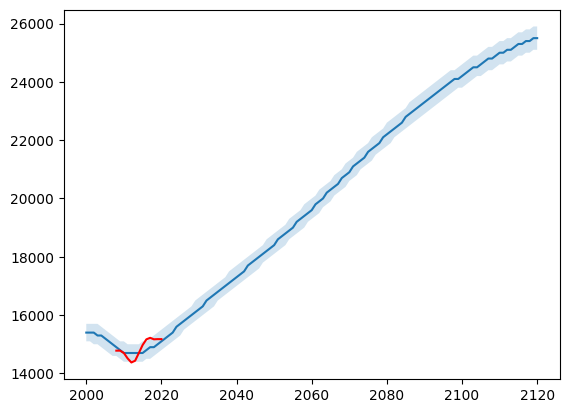

In [59]:
import matplotlib.pyplot as plt
plt.plot(data[data['Город'] == 'Белокуриха']['year'], data[data['Город'] == 'Белокуриха']['Модель'])
plt.plot(data[data['Город'] == 'Белокуриха']['year'], data[data['Город'] == 'Белокуриха']['fact'], color='red')
plt.fill_between(data[data['Город'] == 'Белокуриха']['year'], data[data['Город'] == 'Белокуриха']['Нижняя граница'], data[data['Город'] == 'Белокуриха']['Верхняя граница'], alpha=0.2)

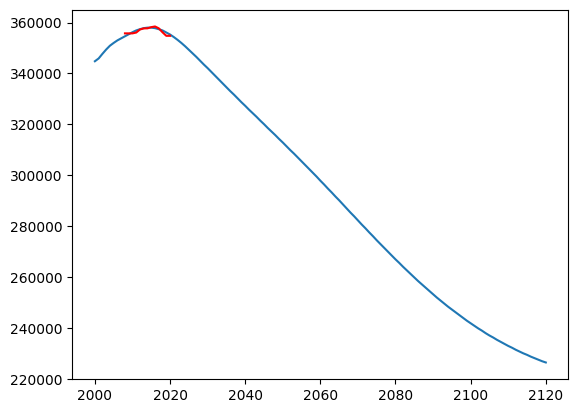

In [60]:
plt.plot(data[data['Город'] == 'Архангельск']['year'], data[data['Город'] == 'Архангельск']['Модель'])
plt.plot(data[data['Город'] == 'Архангельск']['year'], data[data['Город'] == 'Архангельск']['fact'], color='red')

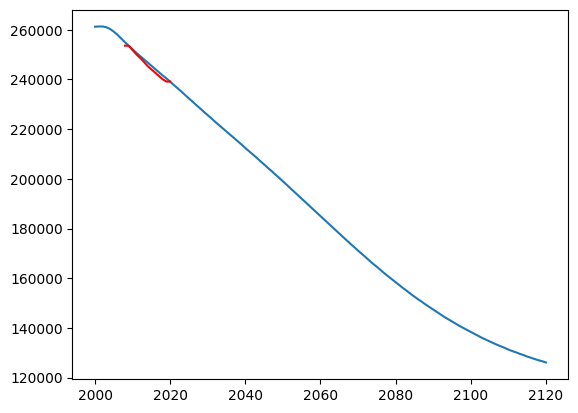

In [61]:
plt.plot(data[data['Город'] == 'Дзержинск']['year'], data[data['Город'] == 'Дзержинск']['Модель'])
plt.plot(data[data['Город'] == 'Дзержинск']['year'], data[data['Город'] == 'Дзержинск']['fact'], color='red')

In [88]:
# Присвоение кодов субъектов РФ городам
data['Код субъекта РФ'] = data['Город'].map(city_to_region)
data['Ранг города'] = data['fact'].apply(city_rang)
data.head(120)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Код субъекта РФ,Ранг города
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000",19,None
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000",19,None
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000",19,None
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000",19,None
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000",19,None
29166,Абаза,2005,NaN,"16,800.000","16,600.000","17,100.000",19,None
29167,Абаза,2006,NaN,"16,900.000","16,700.000","17,100.000",19,None
29168,Абаза,2007,NaN,"16,900.000","16,700.000","17,100.000",19,None
29169,Абаза,2008,"16,938.000","16,900.000","16,700.000","17,100.000",19,малый
29170,Абаза,2009,"16,938.000","16,900.000","16,700.000","17,100.000",19,малый


In [ ]:
pd.options.display.float_format ='{:,.3f}'.format
data.groupby(['Код субъекта РФ', 'year'])['Модель'].mean().reset_index(drop=False)

,Код субъекта РФ,year,Модель
0,2,2000,"280,950.000"
1,2,2001,"284,125.000"
2,2,2002,"289,075.000"
3,2,2003,"294,700.000"
4,2,2004,"300,350.000"
...,...,...,...
8949,91,2116,"134,120.000"
8950,91,2117,"134,300.000"
8951,91,2118,"134,460.000"
8952,91,2119,"134,640.000"


Фактически население в указанных городах растёт. По мнению модели, рост будет продолжаться.

<Axes: xlabel='year', ylabel='fact'>

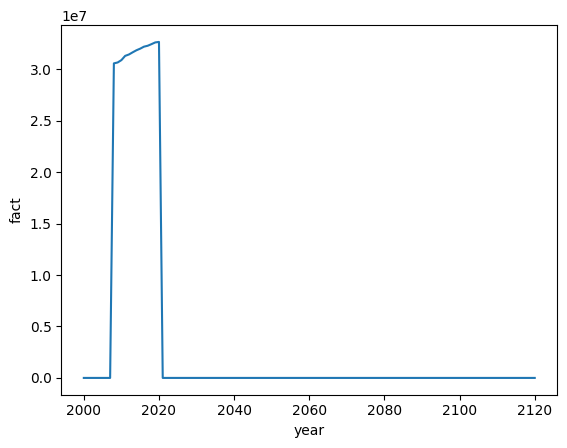

In [ ]:
import seaborn as sns
sns.lineplot(data.groupby('year')['fact'].sum())

<Axes: xlabel='year', ylabel='Модель'>

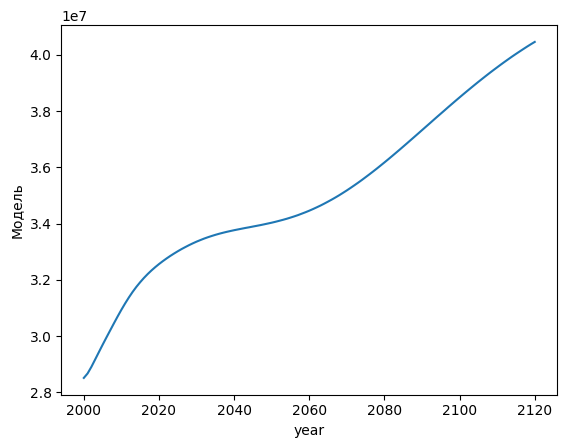

In [ ]:
import seaborn as sns
sns.lineplot(data.groupby('year')['Модель'].sum())

Города, в которых население фактически уменьшается

In [83]:
fact_difference = data[data['year'] == 2020][['Город', 'fact']].set_index('Город') - data[data['year'] == 2008][['Город', 'fact']].set_index('Город')
fact_difference.head(10)

,fact
Город,
Абаза,"-2,035.000"
Агидель,"-5,106.000"
Алатырь,"-8,581.000"
Александровск-Сахалинский,"-4,273.000"
Алексин,"-1,217.000"
Алзамай,-980.000
Алушта,"2,045.000"
Анадырь,"2,239.000"
Анапа,"58,746.000"


In [85]:
fact_difference = fact_difference.reset_index()
fact_difference['Ранг города'] = data[(~data['fact'].isnull()) & (data['year'] == 2008)]['Ранг города'].reset_index(drop=True)
fact_difference['Прирост населения, %'] = fact_difference['fact'] / data[(~data['fact'].isnull()) & (data['year'] == 2008)]['fact'].reset_index(drop=True)*100
fact_difference = fact_difference.set_index('Город')
fact_difference.head()

,fact,Ранг города,"Прирост населения, %"
Город,,,
Абаза,"-2,035.000",малый,-12.014
Агидель,"-5,106.000",малый,-26.617
Алатырь,"-8,581.000",малый,-20.443
Александровск-Сахалинский,"-4,273.000",малый,-28.409
Алексин,"-1,217.000",средний,-1.785


In [ ]:
fact_difference.reset_index(inplace=True)
fact_difference['Код субъекта РФ'] = fact_difference['Город'].map(city_to_region)
fact_difference['Название субъекта РФ'] = fact_difference['Город'].map(city_to_subject)
fact_difference.head(10)

,Город,fact,Код субъекта РФ,Название субъекта РФ
0,Абаза,"-2,035.000",19,Республика Хакасия
1,Агидель,"-5,106.000",2,Республика Башкортостан
2,Алатырь,"-8,581.000",21,Чувашская Республика
3,Александровск-Сахалинский,"-4,273.000",65,Сахалинская область
4,Алексин,"-1,217.000",71,Тульская область
5,Алзамай,-980.000,38,Иркутская область
6,Алушта,"2,045.000",91,Республика Крым
7,Анадырь,"2,239.000",87,Чукотский автономный округ
8,Анапа,"58,746.000",23,Краснодарский край
9,Ангарск,"-1,912.000",38,Иркутская область


Число городов в каждом субъекте

In [ ]:
pd.set_option('display.max_rows', None)
fact_difference.groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Свердловская область                   13
Ивановская область                     10
Нижегородская область                   9
Ленинградская область                   9
Владимирская область                    9
Московская область                      8
Тульская область                        7
Волгоградская область                   7
Воронежская область                     7
Вологодская область                     6
Республика Крым                         6
Иркутская область                       6
Калининградская область                 6
Сахалинская область                     5
Ростовская область                      5
Самарская область                       5
Калужская область                       4
Республика Ингушетия                    4
Республика Башкортостан                 4
Амурская область                        4
Оренбургская область                    4
Архангельская область                   4
Республика Карелия                      4
Республика Ко

Число городов внутри субъекта, у которых уменьшилось фактическое население в 2008 по 2020 год

In [ ]:
fact_difference[fact_difference['fact'] < 0].groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Свердловская область               11
Владимирская область                8
Нижегородская область               8
Ивановская область                  7
Тульская область                    7
Волгоградская область               6
Вологодская область                 6
Иркутская область                   6
Сахалинская область                 5
Архангельская область               4
Ростовская область                  4
Амурская область                    4
Самарская область                   4
Ленинградская область               4
Республика Коми                     3
Республика Карелия                  3
Новосибирская область               3
Оренбургская область                3
Калининградская область             3
Удмуртская Республика               3
Брянская область                    3
Саратовская область                 2
Тверская область                    2
Челябинская область                 2
Приморский край                     2
Тамбовская область           

Число городов внутри субъекта, у которых увеличилось фактическое население в 2008 по 2020 год

In [ ]:
fact_difference[fact_difference['fact'] > 0].groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Московская область                     7
Ленинградская область                  5
Воронежская область                    5
Республика Крым                        5
Республика Ингушетия                   4
Республика Башкортостан                3
Ханты-Мансийский автономный округ      3
Ивановская область                     3
Калининградская область                3
Карачаево-Черкесская Республика        3
Республика Дагестан                    3
Чувашская Республика                   2
Тюменская область                      2
Ставропольский край                    2
Свердловская область                   2
Республика Мордовия                    2
Алтайский край                         2
Камчатский край                        2
Калужская область                      2
Краснодарский край                     2
Москва                                 1
Томская область                        1
Самарская область                      1
Саратовская область                 

In [ ]:
population_growth_fact = fact_difference.groupby('Название субъекта РФ')['fact'].sum().sort_values(ascending=False).reset_index().loc[2:, :]
population_growth_fact

,Название субъекта РФ,fact
2,Московская область,"148,415.000"
3,Республика Башкортостан,"114,915.000"
4,Республика Саха (Якутия),"66,602.000"
5,Чувашская Республика,"44,736.000"
6,Томская область,"39,750.000"
7,Республика Ингушетия,"33,530.000"
8,Республика Дагестан,"28,512.000"
9,Республика Мордовия,"26,639.000"
10,Республика Татарстан,"25,963.000"
11,Ульяновская область,"23,343.000"


Text(0.5, 1.0, 'Прирост населения по субъектам РФ (кроме Москвы и Краснодарского края)')

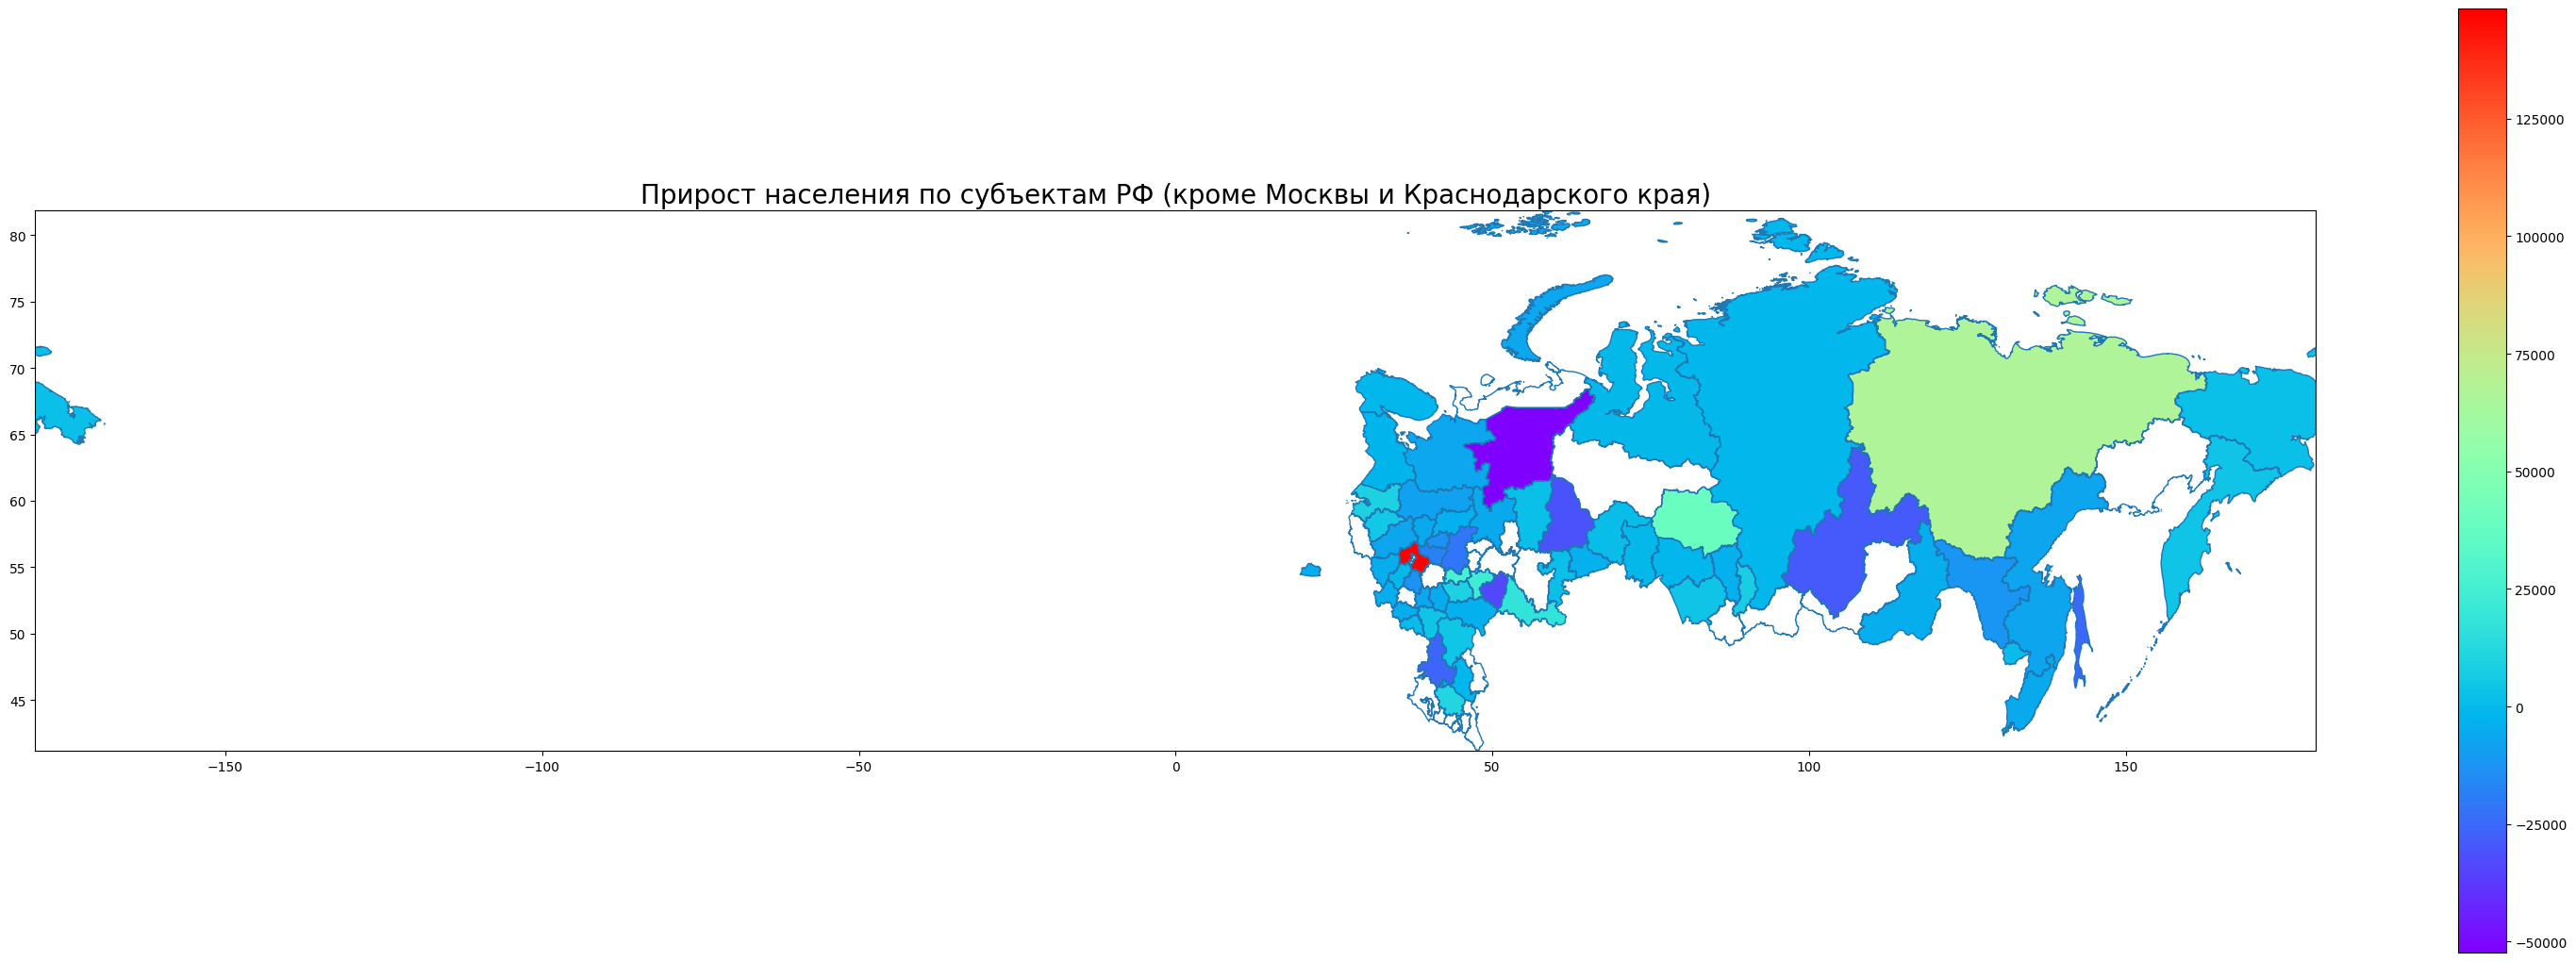

In [ ]:
import geopandas as gpd
from matplotlib.colors import Normalize

# Загрузка геоданных субъектов РФ
gdf = gpd.read_file("russia.geojson")

# Объединение геоданных с данными о приросте населения
gdf = gdf.merge(population_growth_fact, left_on='name', right_on='Название субъекта РФ', how='left')


# Создание нормализатора для цветов
norm = Normalize(vmin=gdf['fact'].min(), vmax=gdf['fact'].max())

# Построение карты
fig, ax = plt.subplots(1, 1, figsize=(39, 13))

# Установка ограничений осей для корректного отображения карты
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Построение субъектов с цветами
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='fact', cmap='rainbow', linewidth=0, ax=ax, edgecolor='0.8', norm=norm)

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

# Добавление заголовка
plt.title('Прирост населения по субъектам РФ (кроме Москвы и Краснодарского края)', fontsize=20)

In [ ]:
model_difference = data[data['year'] == 2120][['Город', 'Модель']].set_index('Город') - data[data['year'] == 2000][['Город', 'Модель']].set_index('Город')
model_difference.head(10)

,Модель
Город,
Абаза,"-14,900.000"
Агидель,"13,700.000"
Алатырь,"-20,500.000"
Александровск-Сахалинский,"-9,800.000"
Алексин,"-23,600.000"
Алзамай,"-6,200.000"
Алушта,"37,000.000"
Анадырь,"33,900.000"
Анапа,"620,500.000"


In [ ]:
model_difference.reset_index(inplace=True)
model_difference['Код субъекта РФ'] = model_difference['Город'].map(city_to_region)
model_difference['Название субъекта РФ'] = model_difference['Город'].map(city_to_subject)
model_difference.head(10)

,Город,Модель,Код субъекта РФ,Название субъекта РФ
0,Абаза,"-14,900.000",19,Республика Хакасия
1,Агидель,"13,700.000",2,Республика Башкортостан
2,Алатырь,"-20,500.000",21,Чувашская Республика
3,Александровск-Сахалинский,"-9,800.000",65,Сахалинская область
4,Алексин,"-23,600.000",71,Тульская область
5,Алзамай,"-6,200.000",38,Иркутская область
6,Алушта,"37,000.000",91,Республика Крым
7,Анадырь,"33,900.000",87,Чукотский автономный округ
8,Анапа,"620,500.000",23,Краснодарский край
9,Ангарск,"-48,300.000",38,Иркутская область


In [ ]:
model_difference[model_difference['Модель'] > 0].groupby('Название субъекта РФ')['Город'].count().sort_values(ascending=False)

Название субъекта РФ
Республика Крым                        5
Ленинградская область                  5
Республика Ингушетия                   4
Московская область                     4
Республика Дагестан                    3
Вологодская область                    3
Калининградская область                3
Ханты-Мансийский автономный округ      3
Свердловская область                   3
Алтайский край                         2
Республика Башкортостан                2
Приморский край                        2
Новосибирская область                  2
Сахалинская область                    2
Республика Мордовия                    2
Краснодарский край                     2
Иркутская область                      2
Воронежская область                    2
Чувашская Республика                   2
Ямало-Ненецкий автономный округ        2
Томская область                        1
Тюменская область                      1
Удмуртская Республика                  1
Саратовская область                 

In [ ]:
population_growth_model = model_difference.groupby('Название субъекта РФ')['Модель'].sum().sort_values(ascending=False).reset_index()
population_growth_model

,Название субъекта РФ,Модель
0,Москва,"5,717,300.000"
1,Чеченская Республика,"2,380,300.000"
2,Краснодарский край,"1,847,500.000"
3,Московская область,"1,292,800.000"
4,Республика Ингушетия,"1,165,500.000"
5,Республика Саха (Якутия),"955,300.000"
6,Республика Дагестан,"690,200.000"
7,Пермский край,"341,100.000"
8,Республика Мордовия,"287,900.000"
9,Ленинградская область,"242,900.000"


Text(0.5, 1.0, 'Прирост населения по субъектам РФ')

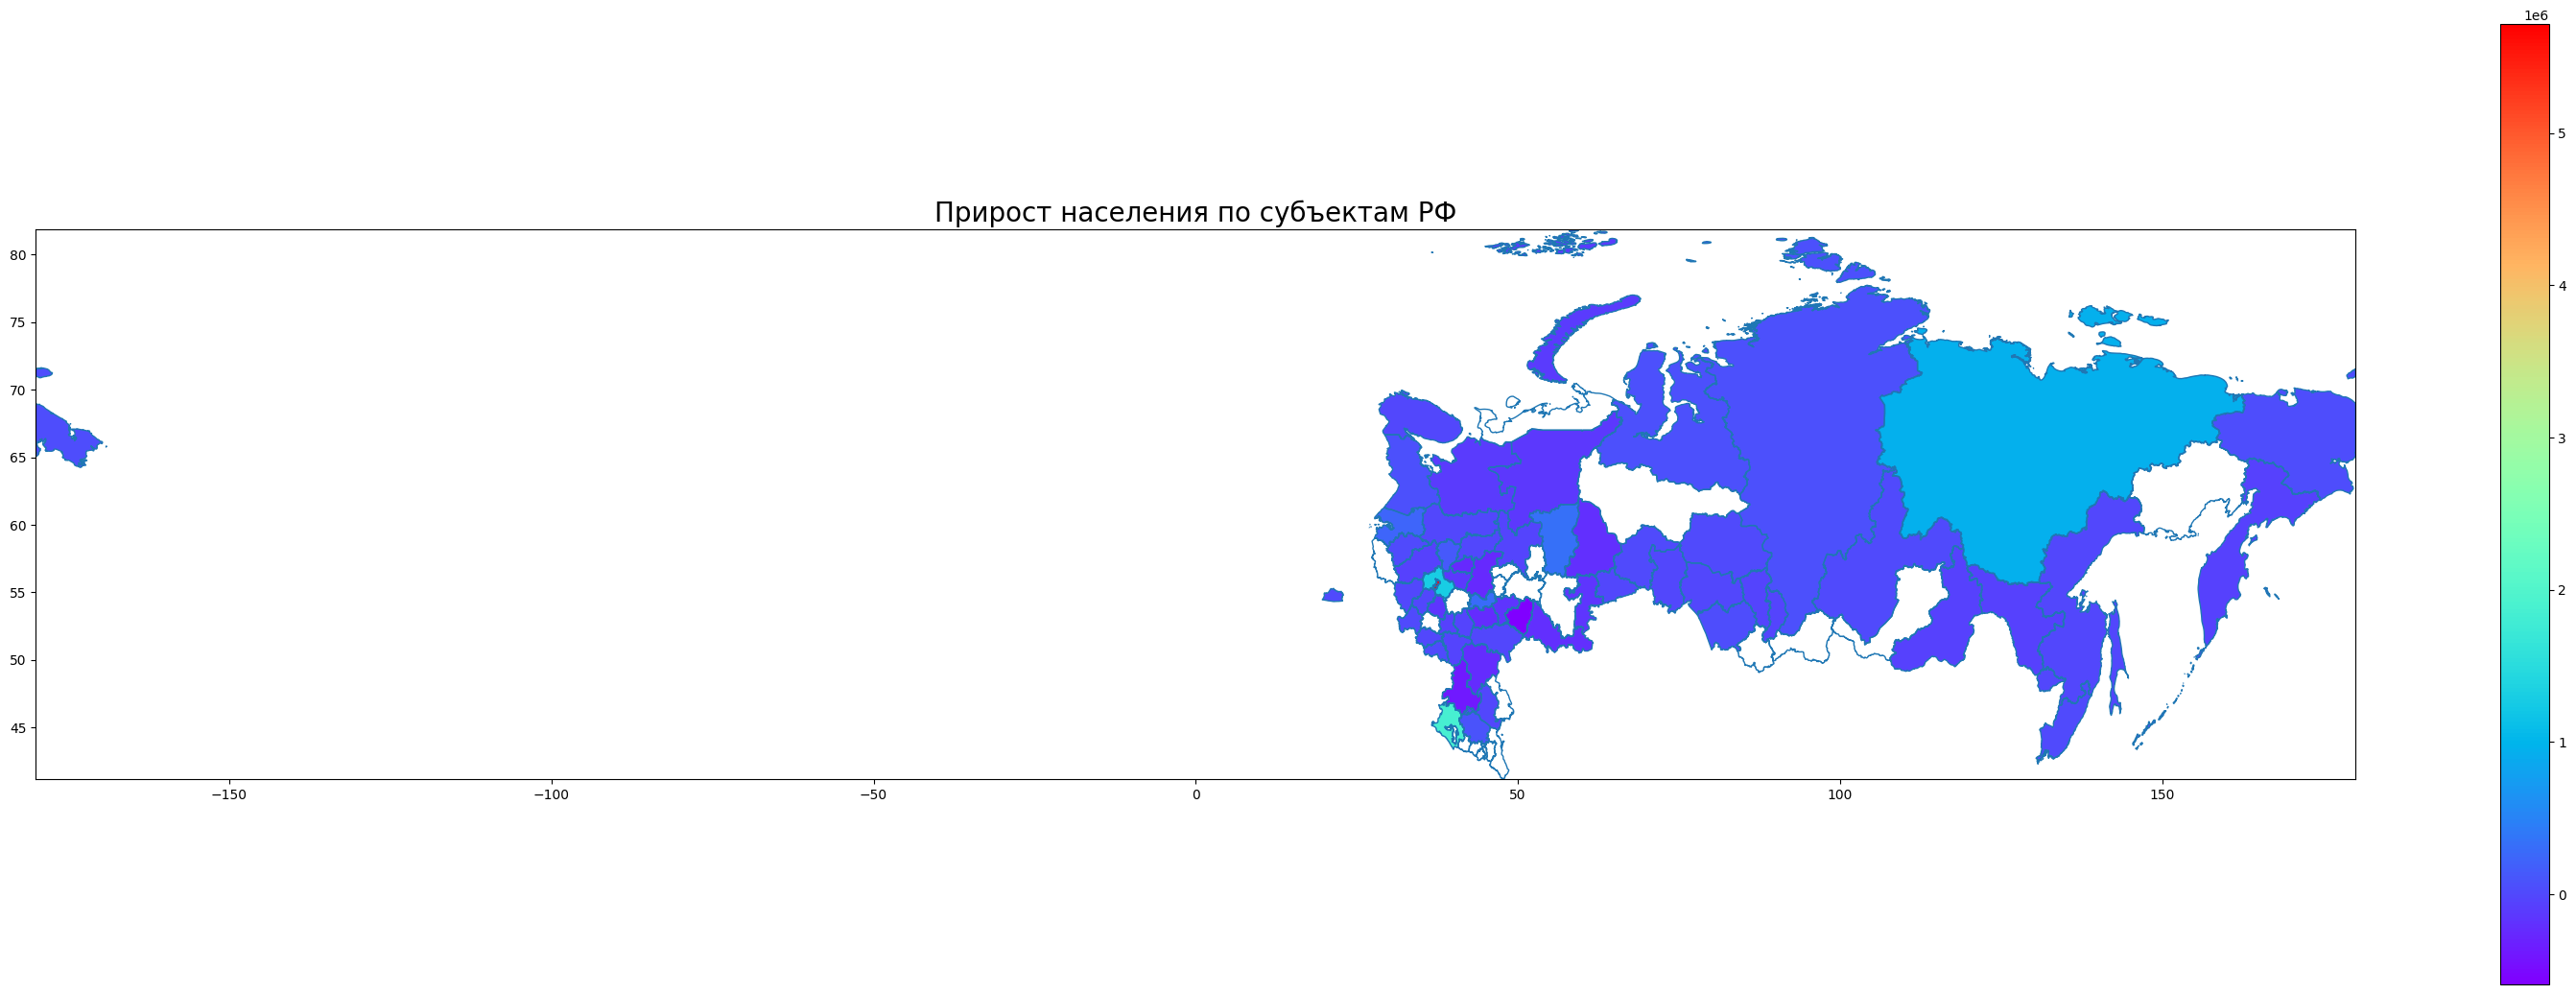

In [ ]:
# Загрузка геоданных субъектов РФ
gdf = gpd.read_file("russia.geojson")

# Объединение геоданных с данными о приросте населения
gdf = gdf.merge(population_growth_model, left_on='name', right_on='Название субъекта РФ', how='left')


# Создание нормализатора для цветов
norm = Normalize(vmin=gdf['Модель'].min(), vmax=gdf['Модель'].max())

# Построение карты
fig, ax = plt.subplots(1, 1, figsize=(39, 13))

# Установка ограничений осей для корректного отображения карты
ax.set_xlim([gdf.total_bounds[0], gdf.total_bounds[2]])
ax.set_ylim([gdf.total_bounds[1], gdf.total_bounds[3]])

# Построение субъектов с цветами
gdf.boundary.plot(ax=ax, linewidth=1)
gdf.plot(column='Модель', cmap='rainbow', linewidth=0, ax=ax, edgecolor='0.8', norm=norm)

# Добавление цветовой шкалы
sm = plt.cm.ScalarMappable(cmap='rainbow', norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax)

# Добавление заголовка
plt.title('Прирост населения по субъектам РФ', fontsize=20)

Посмотреть ту же самую статистику, но с учётом доли населения!!!

Как меняется наседение внутри субъекта? Что с маленькими городами, а что с большими?

In [ ]:

data.head(10)

,Город,year,fact,Модель,Нижняя граница,Верхняя граница,Ранг города
29161,Абаза,2000,NaN,"16,700.000","16,400.000","16,900.000",None
29162,Абаза,2001,NaN,"16,700.000","16,400.000","16,900.000",None
29163,Абаза,2002,NaN,"16,700.000","16,500.000","16,900.000",None
29164,Абаза,2003,NaN,"16,700.000","16,500.000","17,000.000",None
29165,Абаза,2004,NaN,"16,800.000","16,600.000","17,000.000",None
29166,Абаза,2005,NaN,"16,800.000","16,600.000","17,100.000",None
29167,Абаза,2006,NaN,"16,900.000","16,700.000","17,100.000",None
29168,Абаза,2007,NaN,"16,900.000","16,700.000","17,100.000",None
29169,Абаза,2008,"16,938.000","16,900.000","16,700.000","17,100.000",малый
29170,Абаза,2009,"16,938.000","16,900.000","16,700.000","17,100.000",малый


Дисперсионный анализ.

In [90]:
from scipy import stats
# Проведение однофакторного дисперсионного анализа
f_statistic, p_value = stats.f_oneway(fact_difference[fact_difference['Ранг города'] == 'малый']['Прирост населения, %'],
                                      fact_difference[fact_difference['Ранг города'] == 'средний']['Прирост населения, %'],
                                      fact_difference[fact_difference['Ранг города'] == 'большой']['Прирост населения, %'],
                                      fact_difference[fact_difference['Ранг города'] == 'крупный']['Прирост населения, %'],
                                      fact_difference[fact_difference['Ранг города'] == 'крупнейший']['Прирост населения, %'])

# Вывод результатов
print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Есть статистически значимые различия между группами.")
else:
    print("Нет статистически значимых различий между группами.")

F-statistic: 5.369238305505789
p-value: 0.00036908668289857007
Есть статистически значимые различия между группами.
